In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold

from neupy.algorithms import PNN


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
F:\Users\Administrator\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
dataset = datasets.load_iris()
data, target = dataset.data, dataset.target

print("> Start classify iris dataset")
skfold = StratifiedKFold(n_splits=10)

for i, (train, test) in enumerate(skfold.split(data, target), start=1):
    x_train, x_test = data[train], data[test]
    y_train, y_test = target[train], target[test]

    pnn_network = PNN(std=0.1, verbose=False)
    pnn_network.train(x_train, y_train)
    result = pnn_network.predict(x_test)

    n_predicted_correctly = np.sum(result == y_test)
    n_test_samples = test.size

    print("Test #{:<2}: Guessed {} out of {}".format(
        i, n_predicted_correctly, n_test_samples))


> Start classify iris dataset
Test #1 : Guessed 15 out of 15
Test #2 : Guessed 14 out of 15
Test #3 : Guessed 15 out of 15
Test #4 : Guessed 14 out of 15
Test #5 : Guessed 13 out of 15
Test #6 : Guessed 15 out of 15
Test #7 : Guessed 13 out of 15
Test #8 : Guessed 15 out of 15
Test #9 : Guessed 15 out of 15
Test #10: Guessed 15 out of 15


In [20]:
import matplotlib.pyplot as plt

input_data = np.array([
    [0.1961, 0.9806],
    [-0.1961, 0.9806],
    [0.9806, 0.1961],
    [0.9806, -0.1961],
    [-0.5812, -0.8137],
    [-0.8137, -0.5812],
])
print(input_data)
print('\n')
print(input_data.T[0:1, :])
print('\n')
print(input_data.T[0:2,:])
print('\n')

plt.plot(input_data.T[0:1, :], input_data.T[1:2, :], 'ko')
print(input_data)


[[ 0.1961  0.9806]
 [-0.1961  0.9806]
 [ 0.9806  0.1961]
 [ 0.9806 -0.1961]
 [-0.5812 -0.8137]
 [-0.8137 -0.5812]]


[[ 0.1961 -0.1961  0.9806  0.9806 -0.5812 -0.8137]]


[[ 0.1961 -0.1961  0.9806  0.9806 -0.5812 -0.8137]
 [ 0.9806  0.9806  0.1961 -0.1961 -0.8137 -0.5812]]


[[ 0.1961  0.9806]
 [-0.1961  0.9806]
 [ 0.9806  0.1961]
 [ 0.9806 -0.1961]
 [-0.5812 -0.8137]
 [-0.8137 -0.5812]]


In [70]:
import numpy as np
from neupy import algorithms, layers, environment
from sklearn.model_selection import train_test_split
from sklearn import metrics

environment.reproducible()
environment.speedup()

test_data=np.loadtxt('test_data.txt',dtype='float',delimiter=',')
train_data=np.loadtxt('train_data.txt',dtype='float64',delimiter=',')

target=train_data[:,28]
train_data=np.delete(train_data,27,1)

train_data=np.delete(train_data,0,1)

y_target=test_data[:,27]
test_data=np.delete(test_data,27,1)
test_data=np.delete(test_data,0,1)

print(test_data)
print('this is my second data')
print('\n')
print(train_data)
print('\n')
print(train_data.dtype)


x_train, x_test, y_train, y_test = train_test_split(
    train_data, target, test_size=0.2)
n_time_steps=x_train.shape[1]
print('this is my finished data')
print(x_train)
print('\n')
print(x_test)
print('\n')
print('\n')
print(y_train)
print('\n')
print('\n')
print(y_test)
print('\n')
print(n_time_steps)
print('\n')
print(n_categories)
print('\n')
print(x_train.dtype)


network = algorithms.RMSProp(
    [
        layers.Input(n_time_steps),
        # shape: (n_samples, n_time_steps)

        layers.Sigmoid(1),
        # shape: (n_samples, 1)
    ],

    step=0.05,
    verbose=True,
    batch_size=64,

)
network.train(x_train, y_train, x_test, y_test, epochs=20)

y_predicted = network.predict(x_test).round()
accuracy = (y_predicted.T == y_test).mean()



print("Test accuracy: {:.2%}".format(accuracy))


[[1.35e-01 7.30e-06 6.70e-02 ... 0.00e+00 0.00e+00 0.00e+00]
 [1.43e-01 7.10e-06 7.30e-02 ... 0.00e+00 0.00e+00 0.00e+00]
 [1.62e-01 8.00e-06 8.70e-02 ... 0.00e+00 0.00e+00 0.00e+00]
 ...
 [4.34e-01 2.95e-05 1.78e-01 ... 0.00e+00 0.00e+00 0.00e+00]
 [4.64e-01 3.07e-05 1.95e-01 ... 0.00e+00 0.00e+00 0.00e+00]
 [4.74e-01 3.07e-05 1.79e-01 ... 0.00e+00 0.00e+00 0.00e+00]]
this is my second data


[[1.48800e+00 9.02130e-05 9.00000e-01 ... 0.00000e+00 0.00000e+00
  1.00000e+00]
 [7.28000e-01 3.76980e-05 3.53000e-01 ... 0.00000e+00 0.00000e+00
  1.00000e+00]
 [1.22000e+00 7.40410e-05 7.32000e-01 ... 1.00000e+00 1.78000e-01
  1.00000e+00]
 ...
 [2.91200e+00 2.26205e-04 1.14100e+00 ... 1.00000e+00 4.57400e+00
  0.00000e+00]
 [3.78800e+00 2.74883e-04 1.78600e+00 ... 3.00000e+00 1.95750e+01
  0.00000e+00]
 [1.80900e+00 1.48510e-04 6.80000e-01 ... 1.00000e+00 3.38700e+00
  0.00000e+00]]


float64
this is my finished data
[[1.06200e+00 5.43390e-05 2.76000e-01 ... 0.00000e+00 0.00000e+00
  0.00000e

Time: 0:00:00 |N/A%|                           | ETA:  --:--:-- | error: ------

[THEANO] Initialization finished successfully. It took 0.37 seconds

Start training

[TRAINING DATA] shapes: (832, 27)
[TEST DATA] shapes: (208, 27)
[TRAINING] Total epochs: 20

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |     0.50361 |     0.48558 |       87 ms |
|           2 |     0.50361 |     0.48558 |       87 ms |


|           3 |     0.50361 |     0.48558 |       95 ms |
|           4 |     0.50361 |     0.48558 |       91 ms |


|           5 |     0.50361 |     0.48558 |      126 ms |
|           6 |     0.50361 |     0.48558 |      109 ms |


Time: 0:00:00 |N/A%|                           | ETA:  --:--:-- | error: ------

|           7 |     0.50361 |     0.48558 |      106 ms |
|           8 |     0.50361 |     0.48558 |      100 ms |


Time: 0:00:00 |N/A%|                           | ETA:  --:--:-- | error: ------

|           9 |     0.50361 |     0.48558 |      106 ms |
|          10 |     0.50361 |     0.48558 |      105 ms |
|          11 |     0.50361 |     0.48558 |       94 ms |


|          12 |     0.50361 |     0.48558 |      109 ms |
|          13 |     0.50361 |     0.48558 |      114 ms |


|          14 |     0.50361 |     0.48558 |      106 ms |
|          15 |     0.50361 |     0.48558 |      109 ms |


Time: 0:00:00 |N/A%|                           | ETA:  --:--:-- | error: ------

|          16 |     0.50361 |     0.48558 |      106 ms |
|          17 |     0.50361 |     0.48558 |      101 ms |
|          18 |     0.50361 |     0.48558 |       86 ms |


Time: 0:00:00 |N/A%|                                           | ETA:  --:--:--

|          19 |     0.50361 |     0.48558 |      108 ms |
|          20 |     0.50361 |     0.48558 |      106 ms |
---------------------------------------------------------

Test accuracy: 51.44%


In [60]:
import numpy as np

from sklearn.model_selection import train_test_split
from neupy import algorithms, layers, environment
from neupy.datasets import reber


environment.reproducible()
environment.speedup()


def add_padding(data):
    n_sampels = len(data)
    max_seq_length = max(map(len, data))

    data_matrix = np.zeros((n_sampels, max_seq_length))
    for i, sample in enumerate(data):
        data_matrix[i, -len(sample):] = sample

    return data_matrix


# An example of possible values for the `data` and `labels`
# variables
#
# >>> data
# array([array([1, 3, 1, 4]),
#        array([0, 3, 0, 3, 0, 4, 3, 0, 4, 4]),
#        array([0, 3, 0, 0, 3, 0, 4, 2, 4, 1, 0, 4, 0])], dtype=object)
# >>>
# >>> labels
# array([1, 0, 0])
data, labels = reber.make_reber_classification(
    n_samples=10000, return_indeces=True)

# Shift all indeces by 1. In the next row we will add zero
# paddings, so we need to make sure that we will not confuse
# paddings with zero indeces.
data = data + 1

# Add paddings at the beggining of each vector to make sure
# that all samples has the same length. This trick allows to
# train network with multiple independent samples.
print(data)
print('\n')
print('\n')
print('\n')
print('\n')

data = add_padding(data)

print(data)
print('\n')
print('\n')
print('\n')
print('\n')
x_train, x_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2)

n_categories = len(reber.avaliable_letters) + 1  # +1 for zero paddings
n_time_steps = x_train.shape[1]

print(x_train)
print('\n')
print(x_test)
print('\n')
print('\n')
print(y_train)
print('\n')
print('\n')
print(y_test)
print('\n')
print(n_time_steps)
print('\n')
print(n_categories)
print('\n')
print(x_train.dtype)

[array([4, 4, 4, 4, 2, 1, 1, 5, 5, 2]) array([2, 4, 4, 2, 5])
 array([2, 2, 3, 5]) ... array([1, 1, 4, 4, 2, 5]) array([4, 1, 2, 5])
 array([2, 4, 4, 2, 3, 4, 2, 3, 4, 4, 2, 3, 5])]








[[0. 0. 0. ... 5. 5. 2.]
 [0. 0. 0. ... 4. 2. 5.]
 [0. 0. 0. ... 2. 3. 5.]
 ...
 [0. 0. 0. ... 4. 2. 5.]
 [0. 0. 0. ... 1. 2. 5.]
 [0. 0. 0. ... 2. 3. 5.]]








[[0. 0. 0. ... 1. 4. 1.]
 [0. 0. 0. ... 4. 2. 5.]
 [0. 0. 0. ... 1. 1. 3.]
 ...
 [0. 0. 0. ... 4. 3. 3.]
 [0. 0. 0. ... 5. 2. 2.]
 [0. 0. 0. ... 3. 1. 5.]]


[[0. 0. 0. ... 3. 1. 3.]
 [0. 0. 0. ... 4. 2. 5.]
 [0. 0. 0. ... 2. 2. 5.]
 ...
 [0. 0. 0. ... 1. 1. 5.]
 [0. 0. 0. ... 4. 3. 5.]
 [0. 0. 0. ... 1. 1. 5.]]




[0 1 0 ... 0 0 1]




[0 1 1 ... 1 0 1]


29


6


float64


In [76]:
import torch
x = torch.Tensor(5, 3)
y = torch.rand(5, 3)


a = torch.ones(5)
print(a)
b = a.numpy()
print(b)

a.add_(1)
print(a)
print(b)
a.add_(1)
print(a)
print(b)



 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]

[1. 1. 1. 1. 1.]

 2
 2
 2
 2
 2
[torch.FloatTensor of size 5]

[2. 2. 2. 2. 2.]

 3
 3
 3
 3
 3
[torch.FloatTensor of size 5]

[3. 3. 3. 3. 3.]


In [77]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out = a)
print(a)
print(b)


[2. 2. 2. 2. 2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



In [81]:
import torch
from torch.autograd import Variable
x = Variable(torch.ones(2, 2), requires_grad = True)
print(x)
y = x + 2
print(y)
print(y.grad_fn)
z = y * y * 3
out = z.mean()

print(z, out)


Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



In [82]:
x = torch.randn(3)
x = Variable(x, requires_grad = True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)


Variable containing:
 1118.0179
  775.4217
 -985.9751
[torch.FloatTensor of size 3]



In [1]:
"""
View more, visit my tutorial page: https://morvanzhou.github.io/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou
Dependencies:
torch: 0.4
matplotlib
"""
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
 
# torch.manual_seed(1)    # reproducible

# make fake data

n_data = torch.ones(100, 2)
print(n_data)
x0 = torch.normal(2*n_data, 1)      # class0 x data (tensor), shape=(100, 2)
print("/n")

y0 = torch.zeros(100)               # class0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # class1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)                # class1 y data (tensor), shape=(100, 1)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # shape (200,) LongTensor = 64-bit integer


# The code below is deprecated in Pytorch 0.4. Now, autograd directly supports tensors
x, y = Variable(x), Variable(y)

print('this is my x value    ',x)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()


class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.out = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.out(x)
        return x

net = Net(n_feature=2, n_hidden=10, n_output=2)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted

plt.ion()   # something about plotting

for t in range(100):
    out = net(x)                 # input x and predict based on x
    loss = loss_func(out, y)     # must be (1. nn output, 2. target), the target label is NOT one-hotted

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 2 == 0:
        # plot and show learning process
        plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()



    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
    1     1
   

NameError: name 'Variable' is not defined

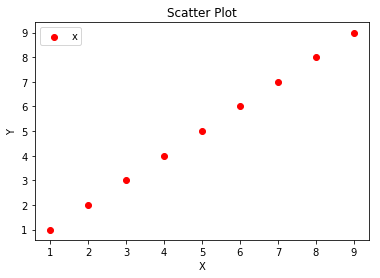

In [103]:
#导入必要的模块
import numpy as np
import matplotlib.pyplot as plt
#产生测试数据
x = np.arange(1,10)
y = x
fig = plt.figure()
ax1 = fig.add_subplot(111)
#设置标题
ax1.set_title('Scatter Plot')
#设置X轴标签
plt.xlabel('X')
#设置Y轴标签
plt.ylabel('Y')
#画散点图
ax1.scatter(x,y,c = 'r',marker = 'o')
#设置图标
plt.legend('x1')
#显示所画的图
plt.show()


In [105]:


# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.cross_validation import train_test_split
from sklearn.metrics import f1_score

# Tuning libraries

from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score

#Import supervised learning model
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Import Graphing modules
import matplotlib.pyplot as plt
from sklearn import datasets

#Initialize the models
clf = GaussianNB()
clf2 = svm.SVC()
clf3 = SGDClassifier(loss = "hinge")
clf4 = GradientBoostingClassifier(n_estimators=100, learning_rate = 1.0, max_depth =1, random_state =0 )


#Data Visualization Values
from pandas.tools.plotting import scatter_matrix
import pylab



#Training and Testing Functions

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label=1)


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    train_classifier(clf, X_train, y_train)
    
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))


# Tuning / Optimization Functions

def performance_metric(y_true, y_predict):
    error = f1_score(y_true, y_predict, pos_label=1)
    return error

def fit_model(X, y):
  
    classifier = svm.SVC()

    parameters = {'kernel':['poly', 'rbf', 'sigmoid'], 'degree':[1, 2, 3], 'C':[0.1, 1, 10]}


    f1_scorer = make_scorer(performance_metric,
                                   greater_is_better=True)

    clf = GridSearchCV(classifier,
                       param_grid=parameters,
                       scoring=f1_scorer)

    clf.fit(X, y)

    return clf


# Read student data
parkinson_data = pd.read_csv("parkinsons.csv")
print "Student data read successfully!"

#Data Exploration

#Number of patients
n_patients = parkinson_data.shape[0]

#Number of features
n_features = parkinson_data.shape[1]-1

#With Parkinsons
n_parkinsons = parkinson_data[parkinson_data['status'] == 1].shape[0]

#Without Parkinsons
n_healthy = parkinson_data[parkinson_data['status'] == 0].shape[0]

#Result Output
print "Total number of patients: {}".format(n_patients)
print "Number of features: {}".format(n_features)
print "Number of patients with Parkinsons: {}".format(n_parkinsons)
print "Number of patients without Parkinsons: {}".format(n_healthy)

#Preparing the Data

# Extract feature columns
feature_cols = list(parkinson_data.columns[1:16]) + list(parkinson_data.columns[18:])
target_col = parkinson_data.columns[17]

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = parkinson_data[feature_cols]
y_all = parkinson_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

# Training and Testing Data Split
num_all = parkinson_data.shape[0] 
num_train = 150 # about 75% of the data
num_test = num_all - num_train

# Select features and corresponding labels for training/test sets

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test,random_state=5)
print "Shuffling of data into test and training sets complete!"

print "Training set: {} samples".format(X_train.shape[0])
print "Test set: {} samples".format(X_test.shape[0])

X_train_50 = X_train[:50]
y_train_50 = y_train[:50]

X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_150 = X_train[:150]
y_train_150 = y_train[:150]

#Training the data

#50 set
print "Naive Bayes:"
train_predict(clf,X_train_50,y_train_50,X_test,y_test)

print "Support Vector Machines:"
train_predict(clf2,X_train_50,y_train_50,X_test,y_test)

print "Stochastic Gradient Descent:"
train_predict(clf3,X_train_50,y_train_50,X_test,y_test)

print "Gradient Tree Boosting:"
train_predict(clf4,X_train_50,y_train_50,X_test,y_test)

#100 set

print "Naive Bayes:"
train_predict(clf,X_train_100,y_train_100,X_test,y_test)

print "Support Vector Machines:"
train_predict(clf2,X_train_100,y_train_100,X_test,y_test)

print "Stochastic Gradient Descent:"
train_predict(clf3,X_train_100,y_train_100,X_test,y_test)

print "Gradient Tree Boosting:"
train_predict(clf4,X_train_100,y_train_100,X_test,y_test)

#150 set

print "Naive Bayes:"
train_predict(clf,X_train_150,y_train_150,X_test,y_test)

print "Support Vector Machines:"
train_predict(clf2,X_train_150,y_train_150,X_test,y_test)

print "Stochastic Gradient Descent:"
train_predict(clf3,X_train_150,y_train_150,X_test,y_test)

print "Gradient Tree Boosting:"
train_predict(clf4,X_train_150,y_train_150,X_test,y_test)

###################

#Data Visualization

#This produces the scatter matrix from my data set. I have commented it out for now.

# pd.scatter_matrix(parkinson_data, alpha = 0.3, figsize = (30,30), diagonal = 'kde');
# pylab.savefig("scatter" + ".png")

###################

#I got the supervised model to be trained from my data set
#Now to tune it to get the optimal model for prediction

#Tuning model (Support Vector Machine)

print "Tuning the model. This may take a while....."

clf2 = fit_model(X_train, y_train)
print "Successfully fit a model!"

print "The best parameters were: " 

print clf2.best_params_

start = time()
    
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf2, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf2, X_test, y_test))

end = time()
    
print "Tuned model in {:.4f} seconds.".format(end - start)







SyntaxError: invalid syntax (<ipython-input-105-fd2e33802883>, line 48)